# Tutorial01: Evaluate Performance of Classifer
> Created Aug. 2024 for the FSU Course: *Machine Learning in Physics* <br>
> H. B. Prosper<br>


## Introduction

In the notebook `tutorial01`, we build a simple classifier to classify the points in the 2D 2-Gaussian dataset. In this notebook we compare the approximate classifier to the exact one. The probability density of the bivariate normal (with $d = 2$) is given by
\begin{align}
\mathcal{N}(x, \mu, \Sigma) & = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2} } \exp\left(-\frac{1}{2} z^T \Sigma^{-1} z \right),
\end{align}
where
\begin{align}
    x & = \begin{bmatrix}
            x_1 \\ x_2
            \end{bmatrix}, \quad
    \mu  = \begin{bmatrix}
            \mu_1 \\ \mu_2
            \end{bmatrix}, \quad
    z  = \begin{bmatrix}
            x_1 - \mu_1 \\ x_2 - \mu_2
            \end{bmatrix},\\
    \Sigma & = \begin{bmatrix}
        \Sigma_{11} & \Sigma_{12}\\
        \Sigma_{21} & \Sigma_{22}
    \end{bmatrix}.
\end{align}
Therefore, the exact classifier is given by
\begin{align}
    p(y=1|x) & = \frac{\mathcal{N}(x, \mu^{(1)}, \Sigma^{(1)}) \, \pi(y=1)}{\mathcal{N}(x, \mu^{(1)}, \Sigma^{(1)})\, \pi(y=1) + \mathcal{N}(x, \mu^{(0)}, \Sigma^{(0)})\, \pi(y=0)},
\end{align}
with $\epsilon = \pi(y=1)\,/\, \pi(y=0) = 1$ for a **balanced dataset**. The superscripts label the distributions of the two classes of points.

In [1]:
# standard system modules
import os, sys

# standard module for tabular data
import pandas as pd

# standard module for array manipulation
import numpy as np

# standard statistical module
import scipy.stats as st

# standard module for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# standard research-level machine learning toolkit from Meta (FKA: FaceBook)
import torch
import torch.nn as nn

# update fonts
FONTSIZE = 12
plt.rcParams.update({
    "text.usetex": True, # turn off if the system can'r find late
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": FONTSIZE
})

# set a seed to ensure reproducibility
seed = 128
rnd  = np.random.RandomState(seed)

## Constants

In [2]:
MODELFILE = 'nnmodel.dict'

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'Available device: {str(DEVICE):4s}')

Available device: cpu 


## Exact density

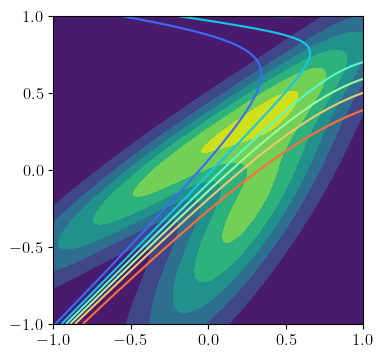

(101, 101)

In [3]:
from exactdensity import ExactDensity

fexact = ExactDensity()
x1, x2 = fexact.grid()

fig = plt.figure(figsize=(4, 4))
ax  = fig.add_subplot(111)

tickmarks = [-1.0, -0.5, 0.0, 0.5, 1.0]
ax.set_xticks(tickmarks)
ax.set_yticks(tickmarks)

ax.contourf(x1, x2, fexact(x1, x2))

pexact = fexact.prob(x1, x2)
ax.contour(x1, x2, pexact, cmap='rainbow')
plt.show()

pexact.shape

## Load model

In [4]:
from nnmodel import model
model.load_state_dict(torch.load(MODELFILE))

<All keys matched successfully>

## Compute approximate $p(y=1|x)$

In [5]:
X1 = x1.flatten()
X2 = x2.flatten()

X  = np.stack([X1, X2], axis=1)
X  = torch.tensor(X).float() # need to use float32 numbers not float64

papprox = model(X).reshape(pexact.shape).detach().numpy()
pexact.shape, papprox.shape

((101, 101), (101, 101))

## Compare exact and approximate $p(y=1|x)$

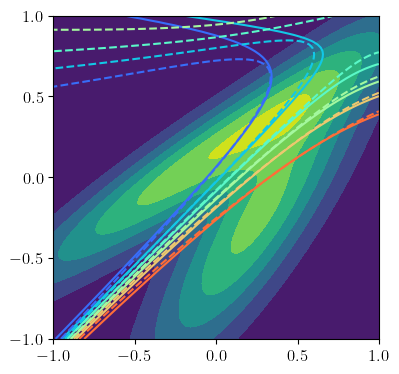

In [6]:
fig = plt.figure(figsize=(4.2, 4.2))
ax  = fig.add_subplot(111)

tickmarks = [-1.0, -0.5, 0.0, 0.5, 1.0]
ax.set_xticks(tickmarks)
ax.set_yticks(tickmarks)

ax.contourf(x1, x2, fexact(x1, x2))

pexact = fexact.prob(x1, x2)

ax.contour(x1, x2, pexact, cmap='rainbow', linestyles='solid')
ax.contour(x1, x2, papprox, cmap='rainbow', linestyles='dashed')

plt.show()